# Machine Learning Internship by Aspiration.ai

# Module 4

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 4.1

In [236]:
df = pd.read_csv('week4.csv')
df

,Unnamed: 0,Date,Unnamed: 0.1,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,...,Day_Perc_Change,Trend,21_day_SMA,34_day_SMA,Trade_Call,Trade_Call_Change,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower
0,0,2017-05-15,0,ITC,EQ,274.95,275.90,278.90,275.50,278.50,...,0.000000,Slight or No change,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1,2017-05-16,1,ITC,EQ,277.95,278.50,284.30,278.00,283.00,...,0.019788,Slight or No change,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
2,2,2017-05-17,2,ITC,EQ,283.45,284.10,284.40,279.25,281.50,...,-0.006350,Slight or No change,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
3,3,2017-05-18,3,ITC,EQ,281.65,278.00,281.05,277.05,277.65,...,-0.013314,Slight or No change,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
4,4,2017-05-19,4,ITC,EQ,277.90,282.25,295.65,281.95,286.40,...,0.029867,Slight or No change,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,489,2019-05-07,491,ITC,EQ,307.00,308.25,309.50,300.85,302.45,...,-0.016612,Slight or No change,301.350000,299.379412,1,0.0,304.478571,1.871416,308.221403,300.735739
490,490,2019-05-08,492,ITC,EQ,301.90,300.00,303.40,298.65,300.60,...,-0.004140,Slight or No change,301.564286,299.530882,1,0.0,304.114286,2.088653,308.291592,299.936979
491,491,2019-05-09,493,ITC,EQ,300.65,299.40,301.30,296.35,299.85,...,-0.002661,Slight or No change,301.804762,299.797059,1,0.0,303.710714,2.331983,308.374681,299.046748
492,492,2019-05-10,494,ITC,EQ,299.85,300.00,300.45,296.90,297.15,...,-0.007004,Slight or No change,301.957143,299.914706,1,0.0,303.035714,2.596923,308.229561,297.841868


In [237]:
df = df.dropna()
df['Date'] = df['Date'].astype('datetime64')
df.set_index('Date', inplace = True)
df.reset_index(inplace = True)

<ipython-input-237-6eee76b915a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].astype('datetime64')


In [238]:
def value(df):
    if df['Close Price'] < df['14_day_bollinger_lower']:
        return "Buy"
    elif (df['Close Price'] > df['14_day_bollinger_lower']) and (df['Close Price'] < df['14_day_SMA']):
        return "Hold Buy/Liquidate Short"
    elif (df['Close Price'] > df['14_day_SMA']) and (df['Close Price'] < df['14_day_bollinger_upper']):
        return "Hold Short/Liquidate Buy"
    elif df['Close Price'] > df['14_day_bollinger_upper']:
        return "Short"

In [239]:
df['Call'] = df.apply(value,axis = 1)
df

<ipython-input-239-fd6db6a5bc3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Call'] = df.apply(value,axis = 1)


,Date,Unnamed: 0,Unnamed: 0.1,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,...,Trend,21_day_SMA,34_day_SMA,Trade_Call,Trade_Call_Change,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call
0,2017-06-30,33,33,ITC,EQ,311.60,310.25,324.70,310.25,323.00,...,Slight or No change,310.321429,305.170588,1,1.0,308.928571,5.684957,320.298485,297.558657,Short
1,2017-07-03,34,34,ITC,EQ,323.65,346.00,354.80,340.30,342.80,...,Slight or No change,311.669048,307.069118,1,0.0,311.650000,10.462350,332.574700,290.725300,Short
2,2017-07-04,35,35,ITC,EQ,342.50,342.80,343.45,336.25,337.95,...,Slight or No change,312.528571,308.651471,1,0.0,313.935714,12.292109,338.519932,289.351497,Hold Short/Liquidate Buy
3,2017-07-05,36,36,ITC,EQ,337.25,337.25,337.85,330.25,331.65,...,Slight or No change,313.176190,310.104412,1,0.0,316.164286,12.369961,340.904208,291.424364,Hold Short/Liquidate Buy
4,2017-07-06,37,37,ITC,EQ,331.05,334.30,338.75,331.30,337.10,...,Slight or No change,314.416667,311.845588,1,0.0,318.678571,12.816872,344.312315,293.044828,Hold Short/Liquidate Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,2019-05-07,489,491,ITC,EQ,307.00,308.25,309.50,300.85,302.45,...,Slight or No change,301.350000,299.379412,1,0.0,304.478571,1.871416,308.221403,300.735739,Hold Buy/Liquidate Short
457,2019-05-08,490,492,ITC,EQ,301.90,300.00,303.40,298.65,300.60,...,Slight or No change,301.564286,299.530882,1,0.0,304.114286,2.088653,308.291592,299.936979,Hold Buy/Liquidate Short
458,2019-05-09,491,493,ITC,EQ,300.65,299.40,301.30,296.35,299.85,...,Slight or No change,301.804762,299.797059,1,0.0,303.710714,2.331983,308.374681,299.046748,Hold Buy/Liquidate Short
459,2019-05-10,492,494,ITC,EQ,299.85,300.00,300.45,296.90,297.15,...,Slight or No change,301.957143,299.914706,1,0.0,303.035714,2.596923,308.229561,297.841868,Buy


In [240]:
df['Call'].value_counts()

Hold Buy/Liquidate Short    207
Hold Short/Liquidate Buy    203
Short                        26
Buy                          25
Name: Call, dtype: int64

In [241]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
LE = LabelEncoder()
SS = StandardScaler()

In [242]:
X = df[['Close Price', '14_day_bollinger_lower', '14_day_SMA', '14_day_bollinger_upper']].values
y = df['Call'].values

In [243]:
X = SS.fit_transform(X)
y = LE.fit_transform(y)

In [244]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 3, shuffle = True)

In [245]:
models_dict = {'Decision Tree Classifier' : DecisionTreeClassifier(random_state= 3),
               'Random Forest Classifier' : RandomForestClassifier(random_state= 4),
               'KNN Classifier' : KNeighborsClassifier(),
               'svc Classifier' : SVC(kernel='linear', random_state= 6),
               'Naive Bayes Classifier' : GaussianNB(),
               'Mlp Classifier' : MLPClassifier(max_iter=10000, random_state=8)}

In [246]:
accuracy = {}

for model_name,model in models_dict.items():
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    accuracy[model_name] = accuracy_score(y_test, pred)

In [247]:
sorted(accuracy.items(), key = lambda x : x[1], reverse= True)

[('Mlp Classifier', 0.9655172413793104),
 ('svc Classifier', 0.8620689655172413),
 ('Decision Tree Classifier', 0.8362068965517241),
 ('KNN Classifier', 0.8362068965517241),
 ('Random Forest Classifier', 0.8103448275862069),
 ('Naive Bayes Classifier', 0.5)]

In [248]:
tcs = pd.read_csv('TCS.csv')
tcs

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81


In [249]:
tcs = tcs[tcs['Series'] == 'EQ']
tcs['Date'] = tcs['Date'].astype('datetime64')
tcs.set_index('Date', inplace = True)
tcs

<ipython-input-249-f07effdf23d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcs['Date'] = tcs['Date'].astype('datetime64')


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
2017-05-16,TCS,EQ,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2017-05-17,TCS,EQ,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
2017-05-18,TCS,EQ,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
2017-05-19,TCS,EQ,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,TCS,EQ,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31
2019-05-08,TCS,EQ,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83
2019-05-09,TCS,EQ,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27


In [250]:
tcs["14_day_SMA"] = tcs['Close Price'].rolling(14).mean()
tcs["14_day_STD"] = tcs['Close Price'].rolling(14).std()
tcs["14_day_bollinger_upper"] = tcs["14_day_SMA"] + tcs["14_day_STD"] * 2
tcs["14_day_bollinger_lower"] = tcs["14_day_SMA"] - tcs["14_day_STD"] * 2
tcs.tail()

<ipython-input-250-e64a6ffc76cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcs["14_day_SMA"] = tcs['Close Price'].rolling(14).mean()
<ipython-input-250-e64a6ffc76cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcs["14_day_STD"] = tcs['Close Price'].rolling(14).std()
<ipython-input-250-e64a6ffc76cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower
Date,,,,,,,,,,,,,,,,,,
2019-05-07,TCS,EQ,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,2161.478571,59.600654,2280.679880,2042.277263
2019-05-08,TCS,EQ,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,2171.360714,42.320799,2256.002313,2086.719115
2019-05-09,TCS,EQ,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,2175.592857,38.891629,2253.376115,2097.809600
2019-05-10,TCS,EQ,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81,2175.878571,38.558426,2252.995423,2098.761720
2019-05-13,TCS,EQ,2135.80,2133.00,2167.00,2121.65,2134.00,2128.75,2143.87,1701744,3.648325e+09,74014,677242,39.80,2174.357143,40.047433,2254.452008,2094.262277


In [251]:
tcs = tcs.dropna()
tcs

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower
Date,,,,,,,,,,,,,,,,,,
2017-06-01,TCS,EQ,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2523.725000,66.942093,2657.609185,2389.840815
2017-06-02,TCS,EQ,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2537.996429,49.565983,2637.128396,2438.864462
2017-06-05,TCS,EQ,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2550.482143,41.378230,2633.238603,2467.725683
2017-06-06,TCS,EQ,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2567.671429,48.235618,2664.142666,2471.200192
2017-06-07,TCS,EQ,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2573.317857,48.890532,2671.098920,2475.536794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,TCS,EQ,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,2161.478571,59.600654,2280.679880,2042.277263
2019-05-08,TCS,EQ,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,2171.360714,42.320799,2256.002313,2086.719115
2019-05-09,TCS,EQ,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,2175.592857,38.891629,2253.376115,2097.809600


In [252]:
test = tcs[['Close Price', '14_day_SMA', '14_day_bollinger_lower', '14_day_bollinger_upper']].values
test = SS.fit_transform(test)

In [253]:
pred = models_dict['Mlp Classifier'].predict(test)

In [254]:
tcs['Call'] = pred
tcs

<ipython-input-254-a93a57610837>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcs['Call'] = pred


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call
Date,,,,,,,,,,,,,,,,,,,
2017-06-01,TCS,EQ,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2523.725000,66.942093,2657.609185,2389.840815,2
2017-06-02,TCS,EQ,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2537.996429,49.565983,2637.128396,2438.864462,2
2017-06-05,TCS,EQ,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2550.482143,41.378230,2633.238603,2467.725683,2
2017-06-06,TCS,EQ,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2567.671429,48.235618,2664.142666,2471.200192,2
2017-06-07,TCS,EQ,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2573.317857,48.890532,2671.098920,2475.536794,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,TCS,EQ,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,2161.478571,59.600654,2280.679880,2042.277263,1
2019-05-08,TCS,EQ,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,2171.360714,42.320799,2256.002313,2086.719115,1
2019-05-09,TCS,EQ,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,2175.592857,38.891629,2253.376115,2097.809600,1


In [255]:
tcs['Call'] = LE.fit(df['Call'].values).inverse_transform(tcs['Call'].values)
tcs

<ipython-input-255-e1047d2fcc6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcs['Call'] = LE.fit(df['Call'].values).inverse_transform(tcs['Call'].values)


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call
Date,,,,,,,,,,,,,,,,,,,
2017-06-01,TCS,EQ,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2523.725000,66.942093,2657.609185,2389.840815,Hold Short/Liquidate Buy
2017-06-02,TCS,EQ,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2537.996429,49.565983,2637.128396,2438.864462,Hold Short/Liquidate Buy
2017-06-05,TCS,EQ,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2550.482143,41.378230,2633.238603,2467.725683,Hold Short/Liquidate Buy
2017-06-06,TCS,EQ,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2567.671429,48.235618,2664.142666,2471.200192,Hold Short/Liquidate Buy
2017-06-07,TCS,EQ,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2573.317857,48.890532,2671.098920,2475.536794,Hold Short/Liquidate Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,TCS,EQ,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,2161.478571,59.600654,2280.679880,2042.277263,Hold Buy/Liquidate Short
2019-05-08,TCS,EQ,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,2171.360714,42.320799,2256.002313,2086.719115,Hold Buy/Liquidate Short
2019-05-09,TCS,EQ,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,2175.592857,38.891629,2253.376115,2097.809600,Hold Buy/Liquidate Short


In [256]:
tcs['Call by Formula'] = tcs.apply(value, axis = 1)
tcs

<ipython-input-256-a975f4995424>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcs['Call by Formula'] = tcs.apply(value, axis = 1)


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call,Call by Formula
Date,,,,,,,,,,,,,,,,,,,,
2017-06-01,TCS,EQ,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2523.725000,66.942093,2657.609185,2389.840815,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
2017-06-02,TCS,EQ,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2537.996429,49.565983,2637.128396,2438.864462,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
2017-06-05,TCS,EQ,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2550.482143,41.378230,2633.238603,2467.725683,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
2017-06-06,TCS,EQ,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2567.671429,48.235618,2664.142666,2471.200192,Hold Short/Liquidate Buy,Short
2017-06-07,TCS,EQ,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2573.317857,48.890532,2671.098920,2475.536794,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,TCS,EQ,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,2161.478571,59.600654,2280.679880,2042.277263,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
2019-05-08,TCS,EQ,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,2171.360714,42.320799,2256.002313,2086.719115,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
2019-05-09,TCS,EQ,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,2175.592857,38.891629,2253.376115,2097.809600,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short


In [257]:
print('Accuracy score of Model is : ', accuracy_score(tcs['Call by Formula'].values, tcs['Call'].values))

Accuracy score of Model is :  0.8128898128898129


### Problem 4.2

In [258]:
reliance = pd.read_csv('RELIANCE.csv')
reliance

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
3,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
4,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,RELIANCE,EQ,07-May-2019,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81
491,RELIANCE,EQ,08-May-2019,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38
492,RELIANCE,EQ,09-May-2019,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65
493,RELIANCE,EQ,10-May-2019,1256.45,1265.00,1277.70,1245.00,1245.75,1251.15,1263.56,11226831,1.418577e+10,231193,3221387,28.69


In [259]:
reliance = reliance[reliance['Series'] == 'EQ']
reliance['Date'] = reliance['Date'].astype('datetime64')
reliance.set_index('Date', inplace = True)
reliance

<ipython-input-259-9ad75b104bc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliance['Date'] = reliance['Date'].astype('datetime64')


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,RELIANCE,EQ,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
2017-05-16,RELIANCE,EQ,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2017-05-17,RELIANCE,EQ,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
2017-05-18,RELIANCE,EQ,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
2017-05-19,RELIANCE,EQ,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,RELIANCE,EQ,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81
2019-05-08,RELIANCE,EQ,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38
2019-05-09,RELIANCE,EQ,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65


In [260]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2017-05-15 to 2019-05-13
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  494 non-null    object 
 1   Series                  494 non-null    object 
 2   Prev Close              494 non-null    float64
 3   Open Price              494 non-null    float64
 4   High Price              494 non-null    float64
 5   Low Price               494 non-null    float64
 6   Last Price              494 non-null    float64
 7   Close Price             494 non-null    float64
 8   Average Price           494 non-null    float64
 9   Total Traded Quantity   494 non-null    int64  
 10  Turnover                494 non-null    float64
 11  No. of Trades           494 non-null    int64  
 12  Deliverable Qty         494 non-null    int64  
 13  % Dly Qt to Traded Qty  494 non-null    float64
dtypes: float64(9), int64(3)

In [261]:
reliance['pct_open_close'] = ((reliance['Close Price'] - reliance['Open Price'])/reliance['Close Price'])*100
reliance['pct_low_high'] = ((reliance['High Price'] - reliance['Low Price'])/reliance['High Price'])*100
reliance['day_pct_change'] = reliance['Close Price'].pct_change().dropna()
reliance['5_day_rm'] = reliance['day_pct_change'].rolling(5).mean()
reliance['5_day_rstd'] = reliance['day_pct_change'].rolling(5).std()
reliance

<ipython-input-261-6c54c677d5ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliance['pct_open_close'] = ((reliance['Close Price'] - reliance['Open Price'])/reliance['Close Price'])*100
<ipython-input-261-6c54c677d5ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliance['pct_low_high'] = ((reliance['High Price'] - reliance['Low Price'])/reliance['High Price'])*100
<ipython-input-261-6c54c677d5ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,pct_open_close,pct_low_high,day_pct_change,5_day_rm,5_day_rstd
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,RELIANCE,EQ,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12,-0.915110,1.688293,NaN,NaN,NaN
2017-05-16,RELIANCE,EQ,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80,0.755733,2.607306,0.009077,NaN,NaN
2017-05-17,RELIANCE,EQ,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47,0.007390,1.332406,-0.002359,NaN,NaN
2017-05-18,RELIANCE,EQ,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85,-0.971861,1.918519,-0.019030,NaN,NaN
2017-05-19,RELIANCE,EQ,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32,-1.072904,1.924085,-0.006404,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,RELIANCE,EQ,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81,-3.818385,3.928315,-0.029894,-0.007079,0.015943
2019-05-08,RELIANCE,EQ,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38,-3.120551,3.567164,-0.032787,-0.013636,0.018792
2019-05-09,RELIANCE,EQ,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65,-2.574714,2.874767,-0.033091,-0.022013,0.015305


In [262]:
reliance = reliance.dropna()
reliance

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,pct_open_close,pct_low_high,day_pct_change,5_day_rm,5_day_rstd
Date,,,,,,,,,,,,,,,,,,,
2017-05-22,RELIANCE,EQ,1318.85,1326.50,1333.60,1315.20,1326.00,1324.15,1322.82,2011859,2.661318e+09,89828,1123947,55.87,-0.177472,1.379724,0.004019,-0.002940,0.010771
2017-05-23,RELIANCE,EQ,1324.15,1325.70,1329.85,1302.00,1304.55,1305.55,1313.55,2108223,2.769247e+09,81667,1172410,55.61,-1.543411,2.094221,-0.014047,-0.007564,0.009166
2017-05-24,RELIANCE,EQ,1305.55,1307.50,1313.70,1295.10,1299.00,1297.70,1302.71,3274804,4.266122e+09,78535,1782580,54.43,-0.755182,1.415848,-0.006013,-0.008295,0.008786
2017-05-25,RELIANCE,EQ,1297.70,1300.00,1312.40,1296.45,1301.50,1302.45,1303.19,5925335,7.721843e+09,114553,4678965,78.97,0.188107,1.215331,0.003660,-0.003757,0.007640
2017-05-26,RELIANCE,EQ,1302.45,1303.95,1344.40,1300.00,1339.00,1337.30,1320.18,4898639,6.467103e+09,111248,2843822,58.05,2.493831,3.302589,0.026757,0.002875,0.015310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,RELIANCE,EQ,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81,-3.818385,3.928315,-0.029894,-0.007079,0.015943
2019-05-08,RELIANCE,EQ,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38,-3.120551,3.567164,-0.032787,-0.013636,0.018792
2019-05-09,RELIANCE,EQ,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65,-2.574714,2.874767,-0.033091,-0.022013,0.015305


In [263]:
reliance['Action'] = 1

for i in range(reliance.shape[0]-1):
    if reliance['Close Price'][i+1] > reliance['Close Price'][i]:
        reliance['Action'][i] = 1
    elif reliance['Close Price'][i+1] < reliance['Close Price'][i]:
        reliance['Action'][i] = -1
        
reliance

<ipython-input-263-78c7a36a5dff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliance['Action'] = 1
<ipython-input-263-78c7a36a5dff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliance['Action'][i] = -1
c:\users\nagen\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_o

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,pct_open_close,pct_low_high,day_pct_change,5_day_rm,5_day_rstd,Action
Date,,,,,,,,,,,,,,,,,,,,
2017-05-22,RELIANCE,EQ,1318.85,1326.50,1333.60,1315.20,1326.00,1324.15,1322.82,2011859,2.661318e+09,89828,1123947,55.87,-0.177472,1.379724,0.004019,-0.002940,0.010771,-1
2017-05-23,RELIANCE,EQ,1324.15,1325.70,1329.85,1302.00,1304.55,1305.55,1313.55,2108223,2.769247e+09,81667,1172410,55.61,-1.543411,2.094221,-0.014047,-0.007564,0.009166,-1
2017-05-24,RELIANCE,EQ,1305.55,1307.50,1313.70,1295.10,1299.00,1297.70,1302.71,3274804,4.266122e+09,78535,1782580,54.43,-0.755182,1.415848,-0.006013,-0.008295,0.008786,1
2017-05-25,RELIANCE,EQ,1297.70,1300.00,1312.40,1296.45,1301.50,1302.45,1303.19,5925335,7.721843e+09,114553,4678965,78.97,0.188107,1.215331,0.003660,-0.003757,0.007640,1
2017-05-26,RELIANCE,EQ,1302.45,1303.95,1344.40,1300.00,1339.00,1337.30,1320.18,4898639,6.467103e+09,111248,2843822,58.05,2.493831,3.302589,0.026757,0.002875,0.015310,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,RELIANCE,EQ,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81,-3.818385,3.928315,-0.029894,-0.007079,0.015943,-1
2019-05-08,RELIANCE,EQ,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38,-3.120551,3.567164,-0.032787,-0.013636,0.018792,-1
2019-05-09,RELIANCE,EQ,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65,-2.574714,2.874767,-0.033091,-0.022013,0.015305,-1


In [264]:
X = reliance[['pct_open_close','pct_low_high','5_day_rm','5_day_rstd']].values
y = reliance['Action'].values

In [265]:
X = SS.fit_transform(X)
y = LE.fit_transform(y)

In [266]:
from sklearn.model_selection import KFold

kf = KFold(n_splits= 3, shuffle=True)

In [267]:
split = kf.split(X)
accuracy = []

for train_index,test_index in split:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    RFS = RandomForestClassifier().fit(X_train,y_train)
    y_pred = RFS.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
print("the accuracy of the model : ", np.mean(accuracy))

the accuracy of the model :  0.5132924335378323


In [268]:
final_model = RandomForestClassifier().fit(X,y)
final_model

RandomForestClassifier()

<ipython-input-269-a92aa57e32b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliance['Net Cummulative Returns'] = (((reliance['Open Price'] - reliance['Close Price'])/(reliance['Open Price']))*100).cumsum()


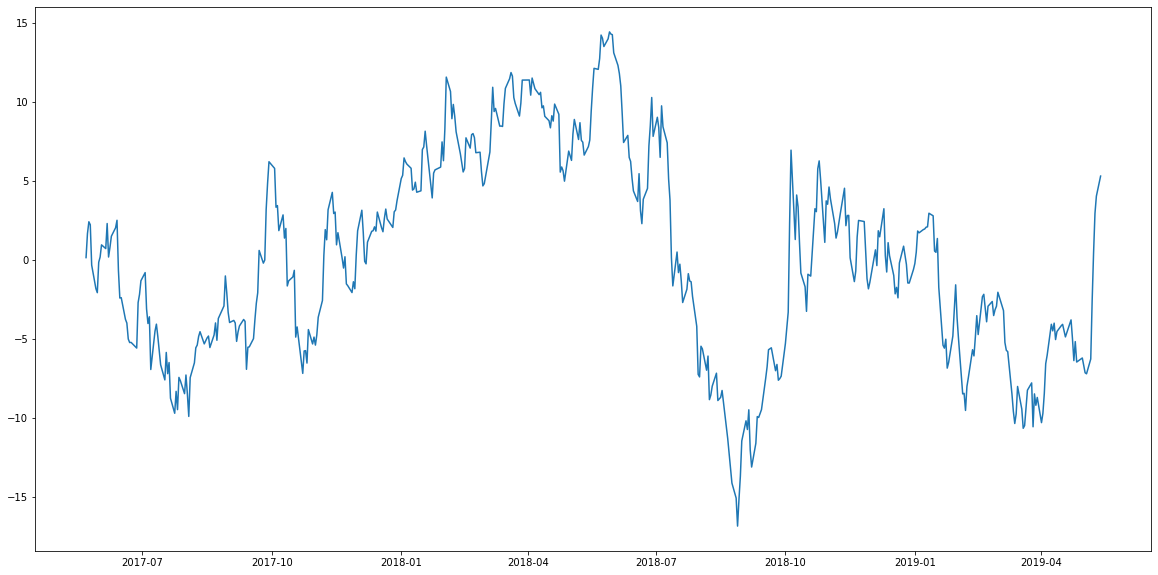

In [269]:
reliance['Net Cummulative Returns'] = (((reliance['Open Price'] - reliance['Close Price'])/(reliance['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(reliance['Net Cummulative Returns'])